In [9]:

from fbprophet import Prophet
import numpy as np
import pandas as pd

In [45]:
sales_df = pd.read_csv('./Book1.csv')

In [46]:
sales_df.shape

(293, 2)

In [47]:
sales_df.head()


,ds,y
0,1992-01-01,146376
1,1992-02-01,147079
2,1992-03-01,159336
3,1992-04-01,163669
4,1992-05-01,170068


In [48]:

sales_df['y_orig'] = sales_df['y'] # to save a copy of the original data..you'll see why shortly. 
# log-transform y
sales_df['y'] = np.log(sales_df['y'])


In [49]:
sales_df.head()

,ds,y,y_orig
0,1992-01-01,11.893934,146376
1,1992-02-01,11.898725,147079
2,1992-03-01,11.978770,159336
3,1992-04-01,12.005601,163669
4,1992-05-01,12.043954,170068


In [50]:
sales_df.tail()

,ds,y,y_orig
288,2016-01-01,12.901537,400928
289,2016-02-01,12.932543,413554
290,2016-03-01,13.039184,460093
291,2016-04-01,13.019078,450935
292,2016-05-01,13.063507,471421


In [51]:
model = Prophet() #instantiate Prophet
model.fit(sales_df) #fit the model with your dataframe

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [52]:
future_data = model.make_future_dataframe(periods=6, freq = 'm')

In [53]:
future_data.head()

,ds
0,1992-01-01
1,1992-02-01
2,1992-03-01
3,1992-04-01
4,1992-05-01


In [54]:
forecast_data = model.predict(future_data)

In [55]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1992-01-01,11.874558,11.854361,11.894249
1,1992-02-01,11.890763,11.870823,11.911136
2,1992-03-01,12.010853,11.992057,12.031453
3,1992-04-01,11.999100,11.979059,12.019652
4,1992-05-01,12.054754,12.034163,12.074857
5,1992-06-01,12.033161,12.013104,12.053921
6,1992-07-01,12.037422,12.018240,12.057182
7,1992-08-01,12.061418,12.042047,12.082064
8,1992-09-01,11.997837,11.977403,12.016049
9,1992-10-01,12.040177,12.020442,12.059327


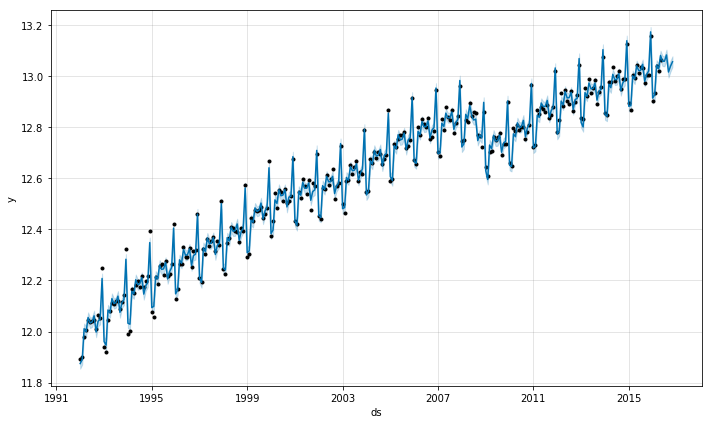

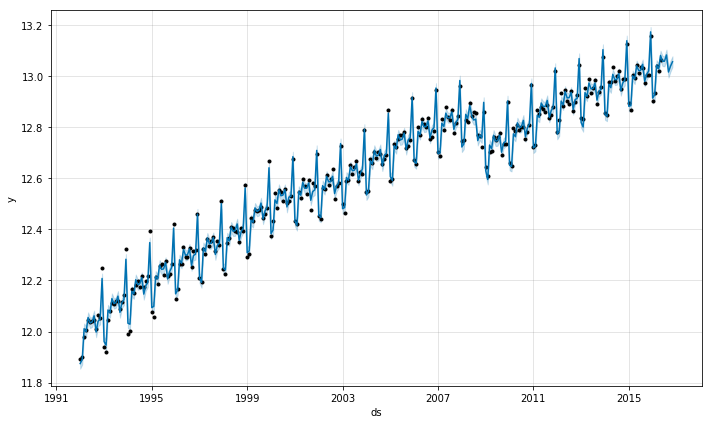

In [57]:
model.plot(forecast_data)

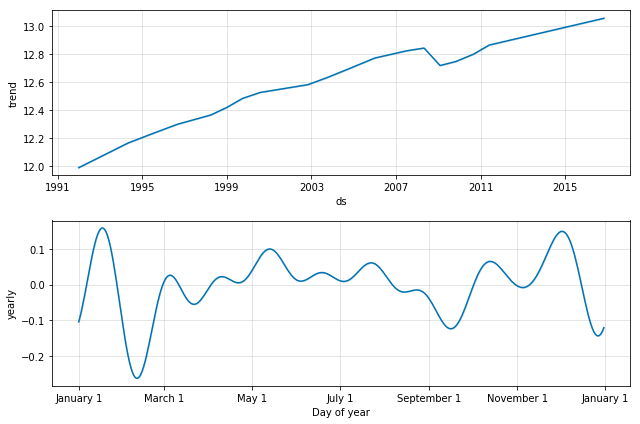

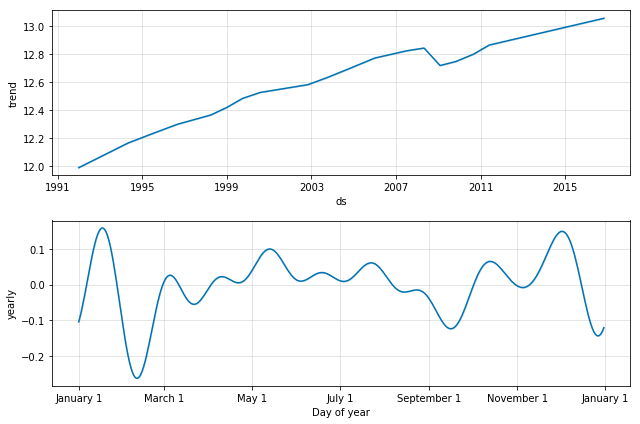

In [58]:
model.plot_components(forecast_data)

In [59]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

In [60]:
forecast_data_orig.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,11.989275,140696.589017,146422.131014,11.989275,11.989275,-0.114717,-0.114717,-0.114717,-0.114717,-0.114717,-0.114717,0.0,0.0,0.0,143567.103420
1,1992-02-01,11.995689,143031.965946,148915.734484,11.995689,11.995689,-0.104926,-0.104926,-0.104926,-0.104926,-0.104926,-0.104926,0.0,0.0,0.0,145912.643537
2,1992-03-01,12.001690,161467.148706,167955.349798,12.001690,12.001690,0.009163,0.009163,0.009163,0.009163,0.009163,0.009163,0.0,0.0,0.0,164530.761729
3,1992-04-01,12.008104,159381.984296,165984.925580,12.008104,12.008104,-0.009004,-0.009004,-0.009004,-0.009004,-0.009004,-0.009004,0.0,0.0,0.0,162608.377259
4,1992-05-01,12.014312,168411.005496,175405.650365,12.014312,12.014312,0.040442,0.040442,0.040442,0.040442,0.040442,0.040442,0.0,0.0,0.0,171914.794373


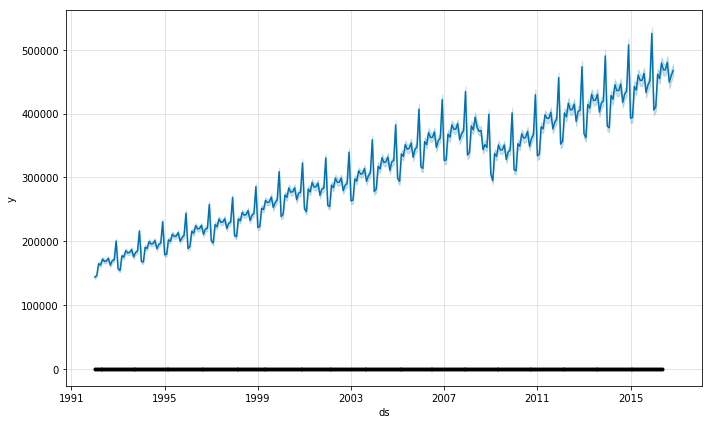

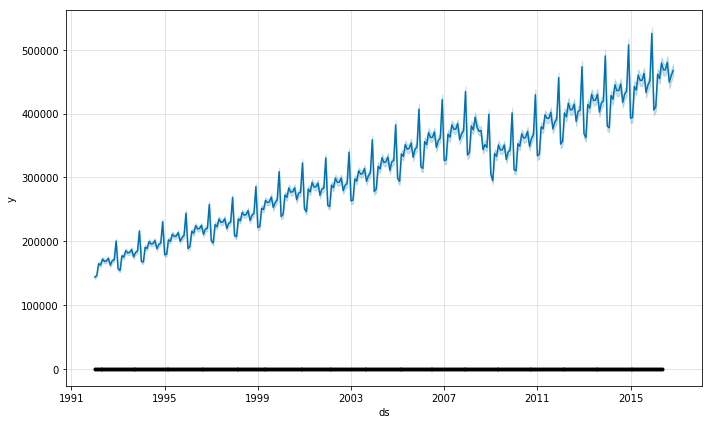

In [61]:
model.plot(forecast_data_orig)

In [62]:

sales_df['y_log']=sales_df['y'] #copy the log-transformed data to another column
sales_df['y']=sales_df['y_orig'] #copy the original data to 'y'

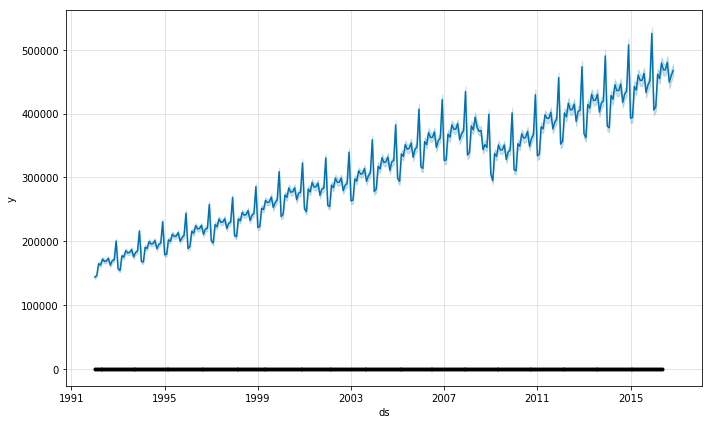

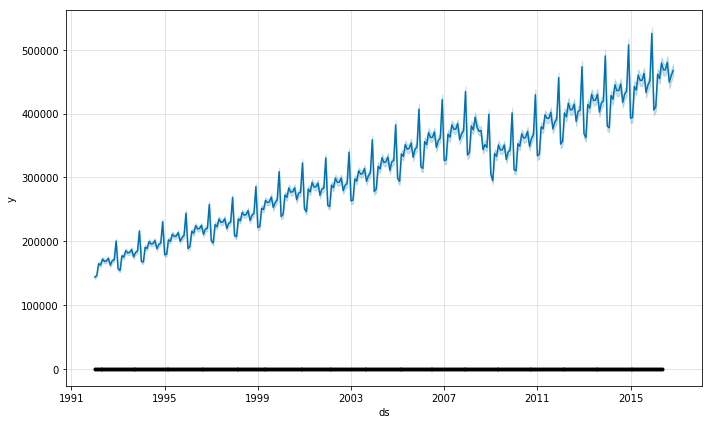

In [63]:
model.plot(forecast_data_orig)